# Dataset Titanic

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy.stats import ttest_ind

In [3]:
titanic_data = pd.read_csv("/content/drive/MyDrive/8.Machine Learning/Dataset Titanic/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## A. Exploratory Analysis

### A1. Overview

In [4]:
print('Titanic dataset Shape = {}'.format(titanic_data.shape))

Titanic dataset Shape = (891, 12)


In [5]:
features = titanic_data.drop(['Survived'], axis=1).columns.tolist()
target = ['Survived']

print('Titanic dataset Features = {}'.format(features))
print('Titanic dataset Target Variable = {}'.format(target))

Titanic dataset Features = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Titanic dataset Target Variable = ['Survived']


**Target Variable:**
* Survived
  * 1 = Survived
  * 0 = Not Survived
  

**Features:**
* PassengerId

* Pclass (Passenger Class) - socio-economic status of the passenger: Upper Class (1), Middle Class (2) and Lower Class (3)

* Name
* Sex
* Age
* SibSp _ total number of the passengers' siblings and spouse
* Parch - total number of the passengers' parents and children
* Ticket - ticket number of the passenger
* Fare - passenger fare
* Cabin - cabin number of the passenger
* Embarked - port of embarkation: Cherbourg (C), Queenstown (Q) and Southampton (S)


In [6]:
null_values = titanic_data.drop(['Survived'], axis=1).isna().sum().sort_values(ascending=False)

print('Titanic dataset null values by feature: \n {}'.format(null_values))

Titanic dataset null values by feature: 
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


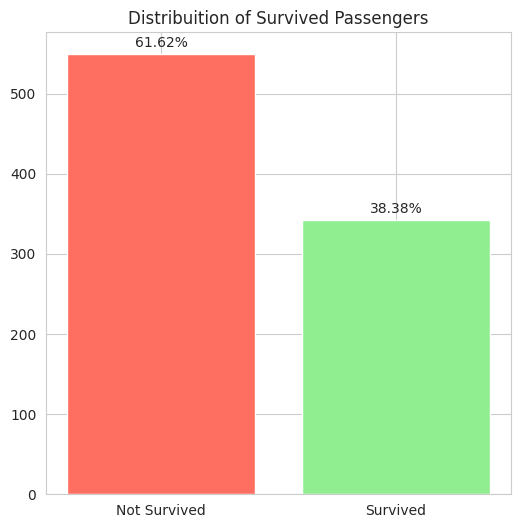

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 6))
cores = ['#FF6F61', '#90EE90']
survived_data = titanic_data['Survived'].value_counts()
percentage = (survived_data / survived_data.sum()) * 100
plt.bar(['Not Survived', 'Survived'],survived_data, color= cores)

for i, percentage in enumerate(percentage):
    plt.text(i, survived_data[i] + 5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Distribuition of Survived Passengers')
plt.show()

---

### A2. Set "PassengerId" as index

* Unique values
* Don´t have effect on the target variable

In [8]:
titanic_data = titanic_data.set_index('PassengerId')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

### A3. Remove Columns with low statistical relevance

* "Name", "Ticket" and "Cabin" columns

In [9]:
titanic_data = titanic_data.drop(["Name","Ticket","Cabin"], axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [10]:
features1 = titanic_data.drop(['Survived'], axis=1).columns.tolist()

print('Titanic dataset Shape after removing "Name", "Ticket" and "Cabin" columns = {}'.format(titanic_data.shape))
print('\nTitanic dataset Features = {}'.format(features1))

Titanic dataset Shape after removing "Name", "Ticket" and "Cabin" columns = (891, 8)

Titanic dataset Features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


---

### A4. Tranform "'Sex" feature

* 1 = female
* 2 = male

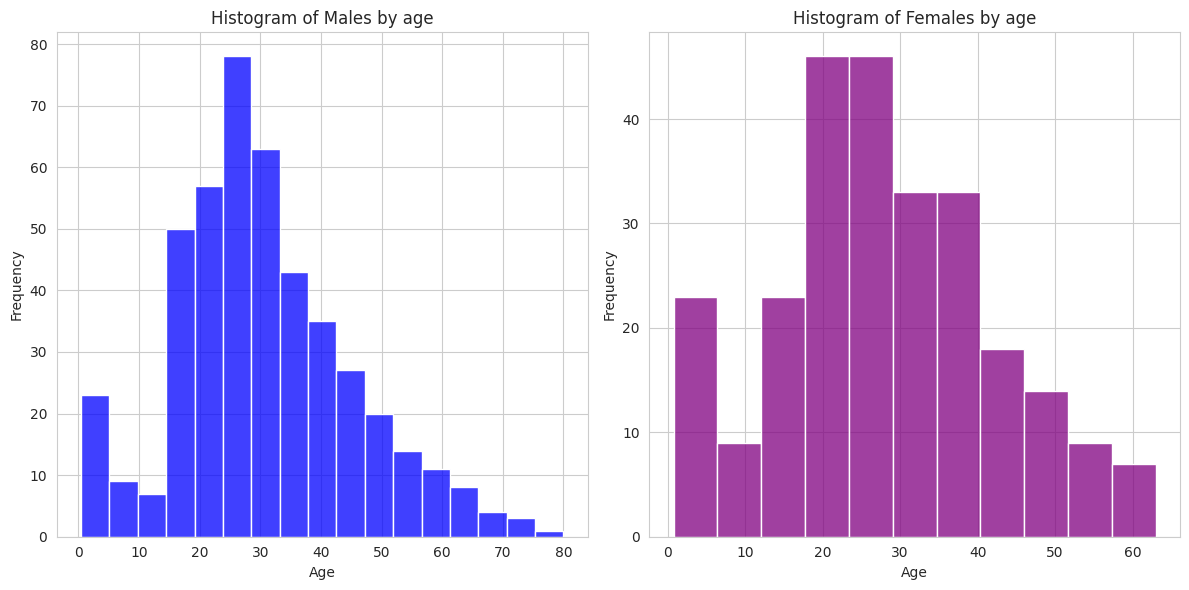

In [11]:
# Histograms by gender
male_data = titanic_data[titanic_data['Sex'] == 'male']['Age']
female_data = titanic_data[titanic_data['Sex'] == 'female']['Age']

# Male
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(male_data, kde=False, label='Male', color='blue', ax=axes[0])
axes[0].set_title('Histogram of Males by age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Female
sns.histplot(female_data, kde=False, label='Female', color='purple', ax=axes[1])
axes[1].set_title('Histogram of Females by age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
titanic_data['Sex'] = titanic_data['Sex'].replace(['female','male'],[1,2])
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,2,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,2,35.0,0,0,8.0500,S


---

### A5. Transform 'Embarked' feature

* C = Cherbourg (1)
* Q = Queenstown (2)
* S = Southampton (3)

In [13]:
titanic_data['Embarked'].replace( 'C', 1, inplace=True)

In [14]:
titanic_data['Embarked'].replace( 'Q', 2,  inplace=True)

In [15]:
titanic_data['Embarked'].replace( 'S',3,  inplace=True)

In [16]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,2,22.0,1,0,7.2500,3.0
2,1,1,1,38.0,1,0,71.2833,1.0
3,1,3,1,26.0,0,0,7.9250,3.0
4,1,1,1,35.0,1,0,53.1000,3.0
5,0,3,2,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...
887,0,2,2,27.0,0,0,13.0000,3.0
888,1,1,1,19.0,0,0,30.0000,3.0
889,0,3,1,NaN,1,2,23.4500,3.0


---

---

## B. Split Titanic Dataset

Split into:
* train set (70%)
* test set (30%)

In [17]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [18]:
#Target variable
y = titanic_data['Survived']

#Features
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [19]:
print('Train Set shape is {}'.format(X_train.shape))

Train Set shape is (623, 7)


In [20]:
print('Test Set shape is {}'.format(X_test.shape))

Test Set shape is (268, 7)


---

## B1. Train set - X_train

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 115 to 38
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    int64  
 2   Age       496 non-null    float64
 3   SibSp     623 non-null    int64  
 4   Parch     623 non-null    int64  
 5   Fare      623 non-null    float64
 6   Embarked  622 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 38.9 KB


## B1.1. Missing values - training set

In [22]:
null_values_train = X_train.isna().sum().sort_values(ascending=False)

print('Train set null values by feature: \n {}'.format(null_values_train))

Train set null values by feature: 
 Age         127
Embarked      1
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64


### B1.1.1 Filling missing values of 'Age' feature with the mean - training set

In [23]:
print('Train set null values in Age feature are: {}'.format(X_train['Age'].isna().sum()))

Train set null values in Age feature are: 127


In [24]:
X_train['Age'].unique()

array([17.  , 28.  ,   nan, 20.  , 47.  , 36.  , 16.  ,  5.  , 25.  ,
       39.  , 18.  , 40.  , 24.  , 19.  , 30.  ,  2.  , 21.  , 43.  ,
       54.  , 14.  , 32.  , 23.  , 37.  ,  1.  , 22.  , 33.  ,  4.  ,
       58.  ,  9.  , 50.  , 31.  , 26.  ,  0.92,  8.  , 70.5 , 45.  ,
       65.  , 60.  ,  0.83, 27.  , 44.  , 20.5 , 35.  , 62.  , 42.  ,
       29.  , 70.  , 49.  ,  3.  , 34.  , 32.5 ,  0.67, 66.  , 15.  ,
       63.  , 40.5 , 74.  , 56.  , 41.  , 30.5 , 10.  , 45.5 , 38.  ,
       59.  , 51.  , 46.  , 13.  ,  6.  , 28.5 , 48.  , 64.  , 61.  ,
       52.  , 23.5 , 57.  ,  7.  , 80.  , 55.  , 55.5 , 71.  , 34.5 ,
        0.75, 11.  ])

In [25]:
age_mean_train = X_train['Age'].mean()
print('The mean age of the Train set is: {}'.format(age_mean_train))

The mean age of the Train set is: 30.08266129032258


In [26]:
X_train['Age'] = X_train['Age'].fillna(value=age_mean_train)
X_train['Age']

PassengerId
115    17.000000
875    28.000000
77     30.082661
877    20.000000
675    30.082661
         ...    
716    19.000000
768    30.500000
73     21.000000
236    30.082661
38     21.000000
Name: Age, Length: 623, dtype: float64

In [27]:
X_train['Age'].isna().sum()

0

In [28]:
X_train['Age'] = X_train['Age'].astype(int)

---

### B1.1.2 Filling missing values of 'Embarked' feature with the mode - train set

In [29]:
X_train['Embarked'].value_counts()

3.0    458
1.0    112
2.0     52
Name: Embarked, dtype: int64

In [30]:
embarked_mode_train = X_train['Embarked'].mode()
print('The mode of the feature Embarked of the Train set is: {}'.format(embarked_mode_train[0]))

The mode of the feature Embarked of the Train set is: 3.0


In [31]:
X_train = X_train.fillna(embarked_mode_train[0])

In [32]:
X_train['Embarked'].isna().sum()

0

---

## B2. Test set - X_test

In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 863 to 93
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    268 non-null    int64  
 1   Sex       268 non-null    int64  
 2   Age       218 non-null    float64
 3   SibSp     268 non-null    int64  
 4   Parch     268 non-null    int64  
 5   Fare      268 non-null    float64
 6   Embarked  267 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 16.8 KB


## B2.1. Missing values - test set

In [34]:
null_values_test= X_test.isna().sum().sort_values(ascending=False)

print('Test set null values by feature: \n {}'.format(null_values_test))

Test set null values by feature: 
 Age         50
Embarked     1
Pclass       0
Sex          0
SibSp        0
Parch        0
Fare         0
dtype: int64


### B2.1.1 Filling missing values of 'Age' feature with the mean - test set

In [35]:
print('Test set null values in Age feature are: {}'.format(X_test['Age'].isna().sum()))

Test set null values in Age feature are: 50


In [36]:
X_test['Age'].unique()

array([48.  ,   nan, 17.  ,  7.  , 21.  , 36.5 , 35.  , 28.  , 25.  ,
       26.  , 54.  , 10.  , 24.  , 36.  , 32.  , 18.  , 14.5 , 27.  ,
       42.  , 22.  , 39.  , 40.5 ,  5.  , 20.  , 47.  , 45.5 ,  1.  ,
       11.  , 16.  , 19.  , 29.  , 61.  , 45.  ,  2.  , 43.  , 14.  ,
       46.  , 57.  , 31.  , 58.  , 34.  , 23.  ,  6.  , 30.  , 59.  ,
       38.  , 49.  , 33.  , 52.  , 44.  ,  0.75, 37.  , 15.  , 62.  ,
        9.  , 24.5 , 71.  , 53.  , 51.  ,  4.  , 28.5 , 56.  , 12.  ,
        0.42, 60.  , 41.  , 40.  , 13.  ])

In [37]:
age_mean_test = X_test['Age'].mean()
print('The mean age of the Test set is: {}'.format(age_mean_test))

The mean age of the Test set is: 28.82646788990826


In [38]:
X_test['Age'] = X_test['Age'].fillna(age_mean_test)
X_test['Age']

PassengerId
863    48.000000
224    28.826468
85     17.000000
681    28.826468
536     7.000000
         ...    
248    24.000000
552    27.000000
240    33.000000
485    25.000000
93     46.000000
Name: Age, Length: 268, dtype: float64

In [39]:
X_test['Age'].isna().sum()

0

In [40]:
X_test['Age'] = X_test['Age'].astype(int)

---

### B2.1.2 Filling missing values of 'Embarked' feature with the mode - test set

In [41]:
X_test['Embarked'].value_counts()

3.0    186
1.0     56
2.0     25
Name: Embarked, dtype: int64

In [42]:
embarked_mode_test = X_test['Embarked'].mode()
print('The mode of the feature Embarked of the Test set is: {}'.format(embarked_mode_test[0]))

The mode of the feature Embarked of the Test set is: 3.0


In [43]:
X_test['Embarked'] = X_test['Embarked'].fillna(embarked_mode_test[0])

In [44]:
X_test['Embarked'].isna().sum()

0

---

---

## C. Exploratory Data Analysis - train set vs test set

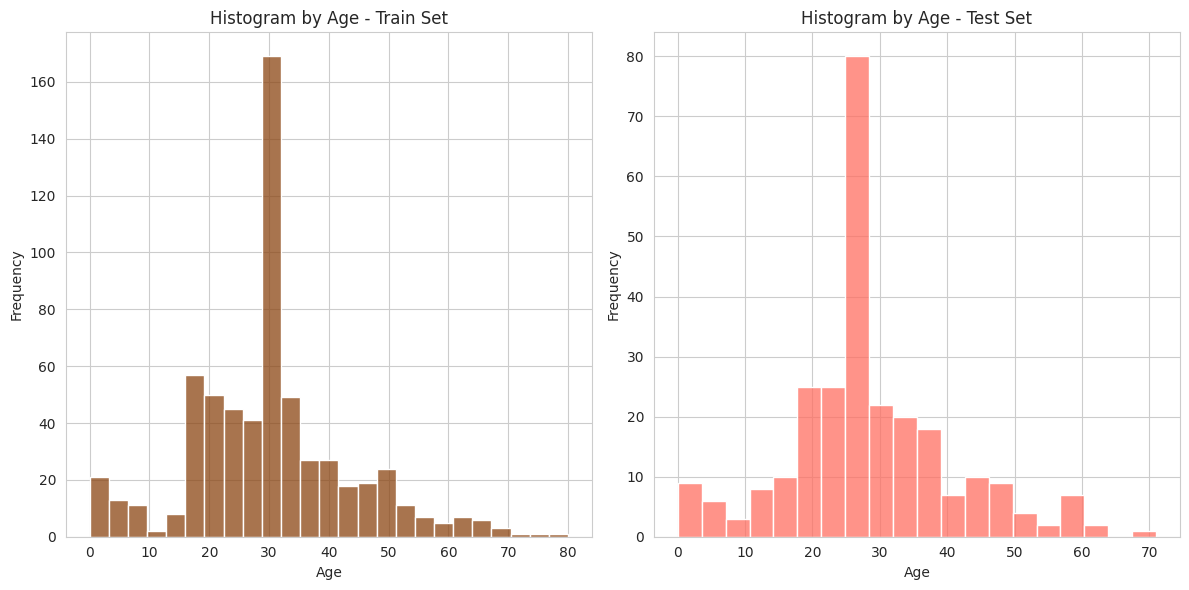

In [45]:
# X_train
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.histplot(X_train['Age'], kde=False, color='#8B4513', ax=axes[0])
axes[0].set_title('Histogram by Age - Train Set')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# X_test
sns.histplot(X_test['Age'], kde=False, color='#FF6F61', ax=axes[1])
axes[1].set_title('Histogram by Age - Test Set')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

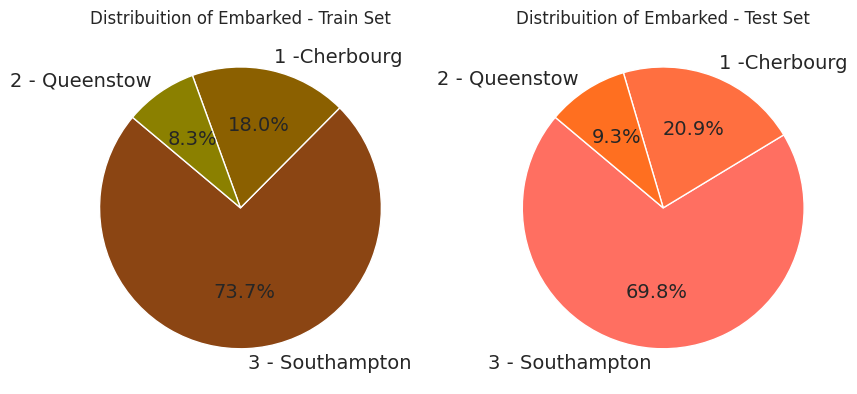

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
#Pie chart Age X_train
axes[0].pie(X_train['Embarked'].value_counts(), labels=['3 - Southampton', '1 -Cherbourg', '2 - Queenstow'], autopct='%1.1f%%', startangle=140, colors=['#8B4513', '#8B6000','#8B8000'], textprops={ 'fontsize': 14})
axes[0].set_title('Distribuition of Embarked - Train Set')
#Pie chart Age X_test
axes[1].pie(X_test['Embarked'].value_counts(), labels=['3 - Southampton', '1 -Cherbourg', '2 - Queenstow'], autopct='%1.1f%%', startangle=140, colors=['#FF6F61','#FF6F40','#FF6F20'], textprops={'fontsize': 14})
axes[1].set_title('Distribuition of Embarked - Test Set')
plt.show()

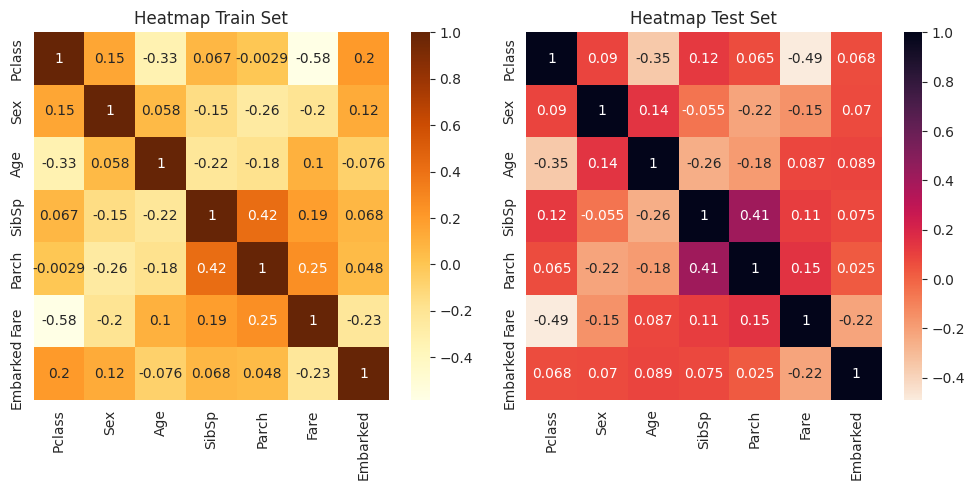

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
# Heatmap X_train
sns.heatmap(X_train.corr(method='pearson'), annot = True, cmap=sns.color_palette("YlOrBr", as_cmap=True), ax=axes[0]);
axes[0].set_title('Heatmap Train Set')
# Heatmap X_test
sns.heatmap(X_test.corr(method='pearson'), annot = True, cmap = sns.color_palette("rocket_r", as_cmap=True), ax=axes[1]);
axes[1].set_title('Heatmap Test Set')
plt.tight_layout()
plt.show()


---

## D. Train dataset model + evaluation

In [48]:
DTclf = tree.DecisionTreeClassifier()

In [49]:
DTclf = DTclf.fit(X_train,y_train)

In [50]:
prediction = DTclf.predict(X_test)

In [51]:
print(prediction)

[1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1
 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 0 0 1]


In [52]:
DTclf.classes_

array([0, 1])

In [53]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [54]:
DTclf.feature_importances_ # explainability

array([0.11012439, 0.33142091, 0.25170946, 0.05819064, 0.00613316,
       0.20689891, 0.03552253])

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       153
           1       0.72      0.62      0.67       115

    accuracy                           0.74       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.73      0.74      0.73       268



---

## E. Predict the survivals on the Titanic_test Dataset

In [57]:
titanic_test_data = pd.read_csv("/content/drive/MyDrive/8.Machine Learning/Dataset Titanic/test.csv")
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## E1. EDA

In [58]:
titanic_test_data = titanic_test_data.drop(["Name","Ticket","Cabin"], axis=1)
titanic_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [59]:
titanic_test_data = titanic_test_data.set_index('PassengerId')
titanic_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [60]:
titanic_test_data['Sex'] = titanic_test_data['Sex'].replace(['female','male'],[1,2])
titanic_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,2,34.5,0,0,7.8292,Q
893,3,1,47.0,1,0,7.0000,S
894,2,2,62.0,0,0,9.6875,Q
895,3,2,27.0,0,0,8.6625,S
896,3,1,22.0,1,1,12.2875,S


In [61]:
titanic_test_data['Embarked'].replace( 'C', 1, inplace=True)
titanic_test_data['Embarked'].replace( 'Q', 2, inplace=True)
titanic_test_data['Embarked'].replace( 'S', 3, inplace=True)
titanic_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,2,34.5,0,0,7.8292,2
893,3,1,47.0,1,0,7.0000,3
894,2,2,62.0,0,0,9.6875,2
895,3,2,27.0,0,0,8.6625,3
896,3,1,22.0,1,1,12.2875,3


In [62]:
age_mean_test_data = titanic_test_data['Age'].mean()
age_mean_test_data

30.272590361445783

In [63]:
titanic_test_data['Age'] = titanic_test_data['Age'].fillna(age_mean_test_data)
titanic_test_data['Age'] = titanic_test_data['Age'].astype(int)
titanic_test_data['Age']

PassengerId
892     34
893     47
894     62
895     27
896     22
        ..
1305    30
1306    39
1307    38
1308    30
1309    30
Name: Age, Length: 418, dtype: int64

In [64]:
embarked_mode_test_data = titanic_test_data['Embarked'].mode()
embarked_mode_test_data[0]

3

In [65]:
titanic_test_data['Embarked'] = titanic_test_data['Embarked'].fillna(embarked_mode_test_data[0])
titanic_test_data['Embarked'] = titanic_test_data['Embarked'].astype(int)
titanic_test_data['Embarked']

PassengerId
892     2
893     3
894     2
895     3
896     3
       ..
1305    3
1306    1
1307    3
1308    3
1309    1
Name: Embarked, Length: 418, dtype: int64

In [66]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 26.1 KB


In [67]:
fare_mean_test_data = titanic_test_data['Fare'].mean()
fare_mean_test_data

35.627188489208635

In [68]:
titanic_test_data['Fare'] = titanic_test_data['Fare'].fillna(fare_mean_test_data)
titanic_test_data['Fare']

PassengerId
892       7.8292
893       7.0000
894       9.6875
895       8.6625
896      12.2875
          ...   
1305      8.0500
1306    108.9000
1307      7.2500
1308      8.0500
1309     22.3583
Name: Fare, Length: 418, dtype: float64

In [69]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 26.1 KB


---

## E2. Predictions

In [70]:
titanic_test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,2,34,0,0,7.8292,2
893,3,1,47,1,0,7.0000,3
894,2,2,62,0,0,9.6875,2
895,3,2,27,0,0,8.6625,3
896,3,1,22,1,1,12.2875,3
...,...,...,...,...,...,...,...
1305,3,2,30,0,0,8.0500,3
1306,1,1,39,0,0,108.9000,1
1307,3,2,38,0,0,7.2500,3


In [71]:
prediction_test = DTclf.predict(titanic_test_data)
print(prediction_test)

[0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 0]


Generate results to kaggle

In [72]:
titanic_test_data["Survived"] = DTclf.predict(titanic_test_data)

In [73]:
titanic_test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
892,3,2,34,0,0,7.8292,2,0
893,3,1,47,1,0,7.0000,3,1
894,2,2,62,0,0,9.6875,2,0
895,3,2,27,0,0,8.6625,3,0
896,3,1,22,1,1,12.2875,3,0
...,...,...,...,...,...,...,...,...
1305,3,2,30,0,0,8.0500,3,0
1306,1,1,39,0,0,108.9000,1,1
1307,3,2,38,0,0,7.2500,3,0


In [74]:
# kaggle data format
kaggle_data = titanic_test_data[["Survived"]]
kaggle_data

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [75]:
kaggle_data.reset_index(inplace=True)
kaggle_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
kaggle_data.to_csv("submission_v1.csv", index=False)

---

### E2.1. Analyse Model Performance

#### E2.1.1. K-Fold Validation

In [77]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [78]:
k = 5
kf = KFold(n_splits=k, random_state=None)

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 55.7 KB


In [80]:
acc_score = []

for train_index , test_index in kf.split(X):

    X_train_fold , X_test_fold = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train_fold , y_test_fold = y.iloc[train_index] , y.iloc[test_index]
    X_train_fold = X_train_fold.fillna(np.mean(X_train_fold.Age))
    X_test_fold = X_test_fold.fillna(np.mean(X_train_fold.Age))

    DTclf.fit(X_train_fold,y_train_fold)
    pred_values = DTclf.predict(X_test_fold)

    acc = accuracy_score(pred_values , y_test_fold)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

In [81]:
avg_acc_score

0.7688343481262946

In [82]:
# Let's also compute the ROC curve for the current model we have
from sklearn.metrics import roc_curve, auc

In [83]:
#y_test e prediction depois do split testar a nossa data test dividida

In [84]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=prediction, pos_label=1)

In [85]:
AUC = auc(fpr, tpr)
AUC

0.720460358056266

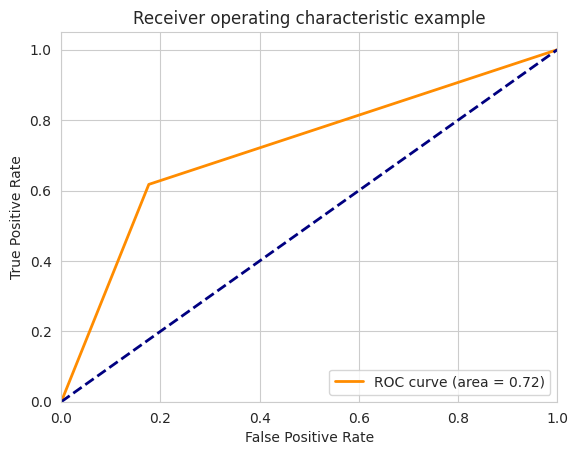

In [86]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % AUC,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

---

## F. Improve our model

In [87]:
# Most common parameters
MAX_DEPTH = [2, 5, 10, 25, 50]
MIN_SAMPLE_SPLIT = [2, 10, 20, 50]
MAX_FEATURES = [ 1,2,3,4,5,6,7, 8]

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters = {'max_depth':MAX_DEPTH,
              'min_samples_split':MIN_SAMPLE_SPLIT,
              "max_features":MAX_FEATURES}

In [90]:
clf = GridSearchCV(DTclf, parameters, cv=5, scoring="accuracy")

In [91]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 25, 50],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 10, 20, 50]},
             scoring='accuracy')

---

### F1.1. Find best parameters

In [92]:
# check best params
clf.best_params_

{'max_depth': 5, 'max_features': 3, 'min_samples_split': 2}

In [93]:
clf.best_score_

0.8347225806451612

In [94]:
best_model = clf.best_estimator_

In [95]:
# since our best model only requires 4 features, we need to select them
best_model.feature_importances_

array([0.09454047, 0.55427188, 0.06792545, 0.08505633, 0.10264247,
       0.07327828, 0.02228512])

In [96]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [97]:
titanic_test_data = titanic_test_data.drop("Survived", axis=1)
titanic_test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,2,34,0,0,7.8292,2
893,3,1,47,1,0,7.0000,3
894,2,2,62,0,0,9.6875,2
895,3,2,27,0,0,8.6625,3
896,3,1,22,1,1,12.2875,3
...,...,...,...,...,...,...,...
1305,3,2,30,0,0,8.0500,3
1306,1,1,39,0,0,108.9000,1
1307,3,2,38,0,0,7.2500,3


In [98]:
# lets make predictions
best_predictions= best_model.predict(titanic_test_data)
best_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Submit to Kaggle best_predictions

In [99]:
# Let's create a function
def write_results_to_disk(test_data, predictions, csv_name):
    data = test_data.copy(deep=True)
    data["Survived"] = predictions
    data = data[["Survived"]]
    data.reset_index(inplace=True)
    data.to_csv(csv_name, index=False)
    print(f"Successfully written {csv_name}")

In [100]:
write_results_to_disk(test_data=titanic_test_data, predictions=best_predictions, csv_name="submission_v2.csv")

Successfully written submission_v2.csv


---

## G. Improve Features

In [101]:
importances = best_model.feature_importances_
importances

array([0.09454047, 0.55427188, 0.06792545, 0.08505633, 0.10264247,
       0.07327828, 0.02228512])

As we can see from above the 1st, 2nd, 3rd and 4rd have the most total importance.

In [102]:
features_to_keep = ["Pclass", "Sex", "Age", "Fare"]

In [103]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,2,22.0,1,0,7.2500,3.0
2,1,1,38.0,1,0,71.2833,1.0
3,3,1,26.0,0,0,7.9250,3.0
4,1,1,35.0,1,0,53.1000,3.0
5,3,2,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...
887,2,2,27.0,0,0,13.0000,3.0
888,1,1,19.0,0,0,30.0000,3.0
889,3,1,NaN,1,2,23.4500,3.0


In [104]:
# so if we train the same model
MAX_DEPTH = [2, 5, 10, 25, 50]
MIN_SAMPLE_SPLIT = [2, 10, 20, 50]
MAX_FEATURES = [ 1,2,3,4]
parameters = {'max_depth':MAX_DEPTH, 'min_samples_split':MIN_SAMPLE_SPLIT, "max_features":MAX_FEATURES}
clf = GridSearchCV(DTclf, parameters, cv=5, scoring="accuracy")
clf.fit(X_train[features_to_keep], y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 5, 10, 25, 50],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [2, 10, 20, 50]},
             scoring='accuracy')

In [105]:
clf.best_params_

{'max_depth': 5, 'max_features': 3, 'min_samples_split': 20}

In [106]:
clf.best_score_

0.8217806451612903

In [107]:
best_model_2 = clf.best_estimator_

In [108]:
# lets make predictions
predictions_2 = best_model_2.predict(titanic_test_data[features_to_keep])

In [109]:
write_results_to_disk(test_data=titanic_test_data, predictions=predictions_2, csv_name="submission_v3.csv")

Successfully written submission_v3.csv
